# Install Dependencies


In [2]:
!pip install tensorflow==2.15.0 keras==2.15 tensorflow-hub==0.13.0 tensorflow-text==2.15.0
!pip install datasets
!pip -q install evaluate
!pip install imbalanced-learn
!pip install transformers datasets scikit-learn imbalanced-learn evaluate

ERROR: Could not find a version that satisfies the requirement tensorflow==2.15.0 (from versions: none)
ERROR: No matching distribution found for tensorflow==2.15.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.2 MB/s eta 0:00:00


# Import Libraries

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.layers import Input
import numpy as np


import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



# Tensor Flow

import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Check if libraries are installed and print their versions
try:
    print(f"TensorFlow Hub Version: {hub.__version__}")
except ImportError:
    print("TensorFlow Hub is not installed.")

try:
    print(f"TensorFlow Text Version: {text.__version__}")
except ImportError:
    print("TensorFlow Text is not installed.")

try:
    print(f"TensorFlow Version: {tf.__version__}")
except ImportError:
    print("TensorFlow is not installed.")

try:
    print(f"pandas Version: {pd.__version__}")
except ImportError:
    print("pandas is not installed.")

try:
    print(f"scikit-learn Version: {train_test_split.__module__.split('.')[0]}")
except ImportError:
    print("scikit-learn is not installed.")

try:
    print(f"scikit-learn Version: {classification_report.__module__.split('.')[0]}")
except ImportError:
    print("scikit-learn is not installed.")

#other usefull

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler


# Import Libraries

from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, Trainer, TrainingArguments, DataCollatorWithPadding
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import Dataset, DatasetDict



TensorFlow Hub Version: 0.16.1
TensorFlow Text Version: 2.17.0
TensorFlow Version: 2.17.1
pandas Version: 2.2.2
scikit-learn Version: sklearn
scikit-learn Version: sklearn


# Import Github

In [7]:
!git clone https://github.com/tajuar-akash-hub/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 40 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 3.87 MiB | 6.29 MiB/s, done.
Resolving deltas: 100% (11/11), done.


# Dataset Location

In [34]:
my_df_loc = '/kaggle/working/Datasets/generated_with_gemini.csv'

# BERT Variations


## DistilBERT

In [9]:
pip install --upgrade sympy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 70.1 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [47]:
# Load the Dataset
data = pd.read_csv(my_df_loc)
data.dropna(inplace=True)
data = data[['Generated_using_gemini', 'fraud_status']]
data['fraud_status'] = data['fraud_status'].astype(int)

In [48]:
# Step 2: Train-Test Split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data['Generated_using_gemini'],
    data['fraud_status'],
    test_size=0.2,
    stratify=data['fraud_status'],
    random_state=42
)

In [49]:
# Step 3: Oversampling on Training Data
ros = RandomOverSampler(random_state=42)
oversampled_texts, oversampled_labels = ros.fit_resample(
    pd.DataFrame({'Generated_using_gemini': train_texts}), train_labels
)

In [50]:
# Flatten oversampled texts back to a list
oversampled_texts = oversampled_texts['Generated_using_gemini'].tolist()


In [51]:
# Step 4: Tokenize Data
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments


tokenizer = RobertaTokenizer.from_pretrained("roberta-base")


In [52]:
# Tokenize Oversampled Training Data

train_encodings = tokenizer(oversampled_texts, truncation=True, padding=True, max_length=200)
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': oversampled_labels.tolist()
})

In [53]:
# Tokenize Test Data
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=200)
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels.tolist()
})

In [54]:
# Step 5: Define RoBERTa Model
num_labels = len(set(train_labels))
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=num_labels)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [55]:
# Step 6: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./roberta-results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [56]:
from sklearn.metrics import matthews_corrcoef
def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average="weighted")
    recall = recall_score(labels, predictions, average="weighted")
    f1 = f1_score(labels, predictions, average="weighted")
    mcc = matthews_corrcoef(labels, predictions)
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "mcc": mcc
    }


In [57]:
# Step 8: Train and Evaluate
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

<ipython-input-57-39e81600df6c>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [58]:
# Train the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Mcc
1,0.268800,0.146636,0.961749,0.958305,0.961749,0.956559,0.609479
2,0.076700,0.256668,0.946721,0.955577,0.946721,0.950233,0.607720
3,0.011000,0.187909,0.965847,0.964287,0.965847,0.964904,0.689164


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


TrainOutput(global_step=516, training_loss=0.21368112511817336, metrics={'train_runtime': 420.2244, 'train_samples_per_second': 39.179, 'train_steps_per_second': 1.228, 'total_flos': 1692132974784000.0, 'train_loss': 0.21368112511817336, 'epoch': 3.0})

In [59]:
# Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Evaluation Results: {'eval_loss': 0.18790915608406067, 'eval_accuracy': 0.9658469945355191, 'eval_precision': 0.9642874064247132, 'eval_recall': 0.9658469945355191, 'eval_f1': 0.9649044106283605, 'eval_mcc': 0.6891644386465137, 'eval_runtime': 5.4183, 'eval_samples_per_second': 135.097, 'eval_steps_per_second': 4.245, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


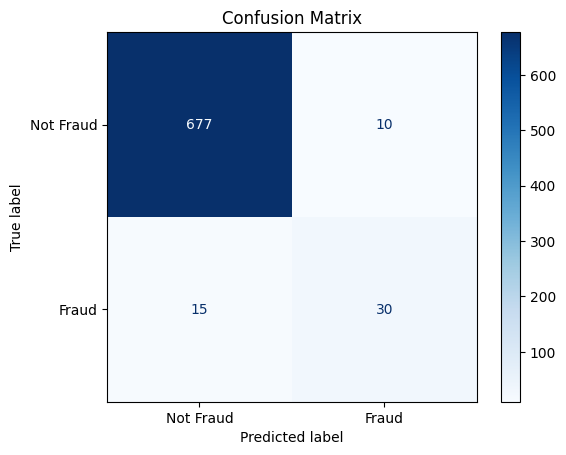

In [60]:
# Step 9: Confusion Matrix

predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=-1)
true_labels = predictions.label_ids
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


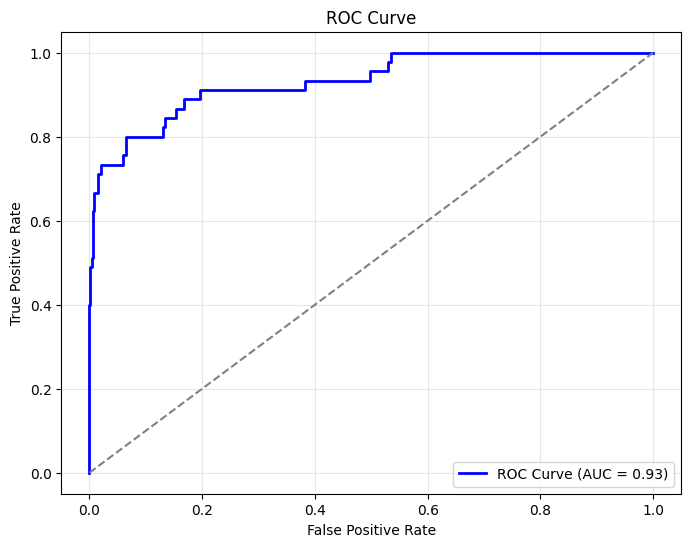

In [61]:
# Step 10: ROC Curve

positive_class_probs = predictions.predictions[:, 1]
fpr, tpr, thresholds = roc_curve(true_labels, positive_class_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


In [62]:
# Step 11: Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=["Not Fraud", "Fraud"]))



Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.98      0.99      0.98       687
       Fraud       0.75      0.67      0.71        45

    accuracy                           0.97       732
   macro avg       0.86      0.83      0.84       732
weighted avg       0.96      0.97      0.96       732



In [63]:
# Save the model
model.save_pretrained("./roberta-fraud-detection")
tokenizer.save_pretrained("./roberta-fraud-detection")


('./roberta-fraud-detection/tokenizer_config.json',
 './roberta-fraud-detection/special_tokens_map.json',
 './roberta-fraud-detection/vocab.json',
 './roberta-fraud-detection/merges.txt',
 './roberta-fraud-detection/added_tokens.json')

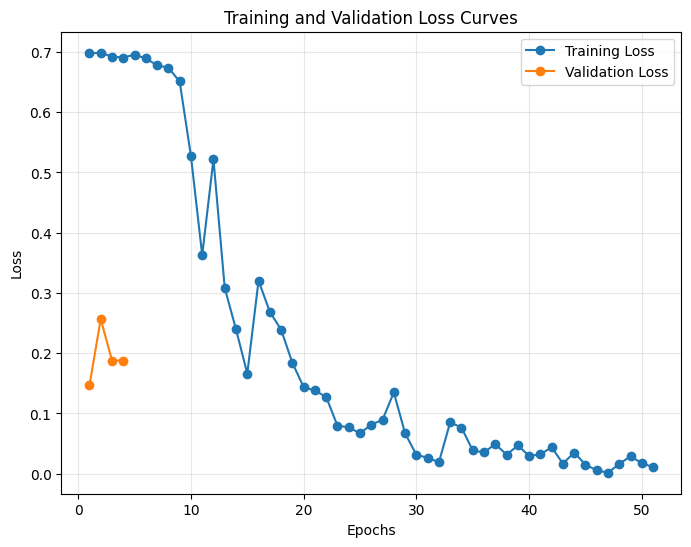

In [64]:
# Extracting Training and Validation Loss from Trainer Logs
import matplotlib.pyplot as plt

# Fetch log history from the trainer
train_metrics = trainer.state.log_history

# Extract losses over epochs
train_loss = [log["loss"] for log in train_metrics if "loss" in log]  # Training loss
eval_loss = [log["eval_loss"] for log in train_metrics if "eval_loss" in log]  # Validation loss

# Plot Losses
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss", marker="o")
plt.plot(range(1, len(eval_loss) + 1), eval_loss, label="Validation Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


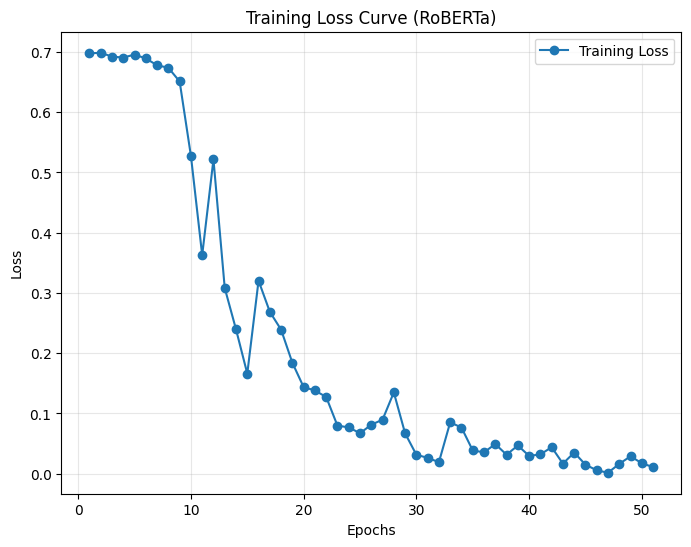

In [65]:
import matplotlib.pyplot as plt

# Extract training loss from the RoBERTa training logs
roberta_train_metrics = trainer.state.log_history  # Replace with your `trainer` object

# Extract only the training loss
roberta_train_loss = [log["loss"] for log in roberta_train_metrics if "loss" in log]

# Plot the Training Loss Curve for RoBERTa
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(roberta_train_loss) + 1), roberta_train_loss, label="Training Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve (RoBERTa)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()